In [1]:
import pandas as pd

In [27]:
links_small = pd.read_csv(fr'C:\Users\jasmi\Desktop\Research\Projects\The movies dataset\links_small.csv')
youtube = pd.read_csv(fr'C:\Users\jasmi\Desktop\Research\Projects\The movies dataset\ml-youtube.csv')
ratings_small = pd.read_csv(fr'C:\Users\jasmi\Desktop\Research\Projects\The movies dataset\ratings_small.csv')


In [28]:
links_small

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9120,162672,3859980,402672.0
9121,163056,4262980,315011.0
9122,163949,2531318,391698.0
9123,164977,27660,137608.0


In [29]:
youtube

,youtubeId,movieId,title
0,K26_sDKnvMU,1,Toy Story (1995)
1,3LPANjHlPxo,2,Jumanji (1995)
2,rEnOoWs3FuA,3,Grumpier Old Men (1995)
3,j9xml1CxgXI,4,Waiting to Exhale (1995)
4,ltwvKLnj1B4,5,Father of the Bride Part II (1995)
...,...,...,...
25618,-oB6DN5dYWo,131252,Forklift Driver Klaus: The First Day on the Jo...
25619,DK7KQ-gEdl4,131256,"Feuer, Eis & Dosenbier (2002)"
25620,v29P-wchMZQ,131258,The Pirates (2014)
25621,dAz-nZ65jYU,131260,Rentun Ruusu (2001)


In [30]:
ratings_small

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [31]:
unique_movie_ids_from_youtube = youtube['movieId'].unique().tolist()
len(unique_movie_ids_from_youtube)

25623

In [32]:
unique_movie_ids_from_links_small = links_small['movieId'].unique().tolist()
len(unique_movie_ids_from_links_small)

9125

In [33]:
unique_movie_ids_from_ratings_small = ratings_small['movieId'].unique().tolist()
len(unique_movie_ids_from_ratings_small)

9066

In [36]:
# Assume unique_movie_ids_from_links_small, unique_movie_ids_from_youtube, and
# unique_movie_ids_from_ratings_small are defined lists
common_items = set(unique_movie_ids_from_links_small).intersection(
    set(unique_movie_ids_from_youtube),
    set(unique_movie_ids_from_ratinzgs_small)
)
total_common_items = len(common_items)
print(total_common_items)


8692


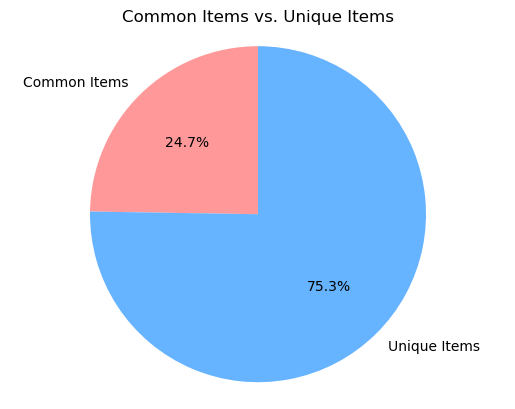

In [37]:
import matplotlib.pyplot as plt

# Assuming you have already defined unique_movie_ids_from_links_small, unique_movie_ids_from_youtube,
# and unique_movie_ids_from_ratings_small lists
common_items = set(unique_movie_ids_from_links_small).intersection(
    set(unique_movie_ids_from_youtube),
    set(unique_movie_ids_from_ratings_small)
)
total_common_items = len(common_items)

# Update the 'sizes' list to include all unique elements from the three lists minus the common items, counted twice
unique_items_count = (
    len(unique_movie_ids_from_links_small) +
    len(unique_movie_ids_from_youtube) +
    len(unique_movie_ids_from_ratings_small) -
    total_common_items * 2  # Subtract the common_items counted twice
)

# Create a pie chart
labels = ['Common Items', 'Unique Items']
sizes = [total_common_items, unique_items_count]
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Common Items vs. Unique Items')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()


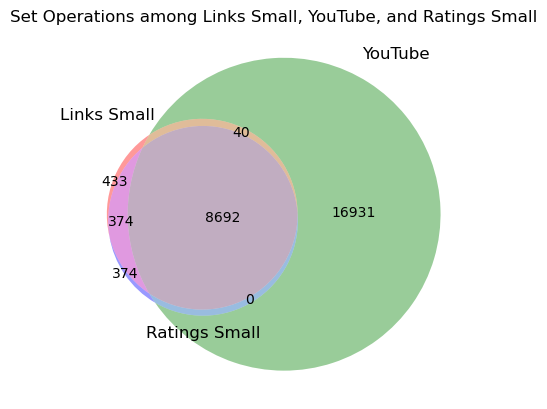

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Assuming you have already defined unique_movie_ids_from_links_small, unique_movie_ids_from_youtube,
# and unique_movie_ids_from_ratings_small lists

# Determine the set operations between the three lists
set_links_small = set(unique_movie_ids_from_links_small)
set_youtube = set(unique_movie_ids_from_youtube)
set_ratings_small = set(unique_movie_ids_from_ratings_small)

# Calculate intersections and differences
common_all = set_links_small.intersection(set_youtube, set_ratings_small)
unique_links = set_links_small - common_all
unique_youtube = set_youtube - common_all
unique_ratings = set_ratings_small - common_all
common_links_youtube = set_links_small.intersection(set_youtube) - common_all
common_links_ratings = set_links_small.intersection(set_ratings_small) - common_all
common_youtube_ratings = set_youtube.intersection(set_ratings_small) - common_all

# Create the Venn diagram
venn3(subsets=(len(unique_links), len(unique_youtube), len(common_links_youtube),
               len(unique_ratings), len(common_links_ratings), len(common_youtube_ratings), len(common_all)),
      set_labels=('Links Small', 'YouTube', 'Ratings Small'))

# Add a title
plt.title('Set Operations among Links Small, YouTube, and Ratings Small')

# Display the Venn diagram
plt.show()
